# Image Processing - Crossplane and Inplane Symmetry

In [35]:
# enter virtual env with source bin/activate

# do stuff with pylinac, output as csv

# then exit virtual env (jsut exit terminal)

# in non virtualenv, combine pylinac stuff with opencv stuff

# dazzle sinan

In [36]:
from pylinac.flatsym import BeamImage

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
from io import BytesIO
from PIL import Image

%matplotlib inline

In [48]:
cleaned_df = pd.read_csv('data/modelready.csv')

In [50]:
cleaned_df.drop('Unnamed: 0', axis =1, inplace = True)

In [51]:
cleaned_df.head()

,artist,description,height,image,price,size,title,url_id,width,area,price_sqin,price_class
0,alexandra mas,"It is part of ""Préconçue"" art show, against pr...",47.24,http://ecx.images-amazon.com/images/I/519lYUvA...,5100.0,"[u'47.24', u'31.5', u'3.94 in.']","For sale,",B015EOYYEE,31.5,1488.06,3.427281,4.0
1,joel degrand,"Uniforms, Outfits, & Accessories We think of t...",90.00,http://ecx.images-amazon.com/images/I/51MCovXG...,10000.0,"[u'90', u'72', u'0.5 in.']","Steve, Fireman, Beverly Shores, IN,",B00IRTE78C,72.0,6480.00,1.543210,4.0
2,leonard freed,"Fire Hydrant, Harlem, 1963, 20x16, Archival Ir...",20.00,http://ecx.images-amazon.com/images/I/51hNjtVj...,2000.0,"[u'20', u'16 in.']","Fire Hydrant,",B01EKBYJYW,16.0,320.00,6.250000,3.0
3,leo mason,Sporting history is made. This is the first ti...,12.00,http://ecx.images-amazon.com/images/I/51SKAEkp...,288.0,"[u'12', u'18 in.']","Ayrton Senna F1,",B016VGE62E,18.0,216.00,1.333333,0.0
4,daniela federici,NaN,24.00,http://ecx.images-amazon.com/images/I/41q3a2kG...,320.0,"[u'24', u'18 in.']","Nude in Water,",B016VGKAW4,18.0,432.00,0.740741,1.0


In [79]:
# opens url as image without saving it locally

#def img_symmetry(url):
#img = Image.open(BytesIO(urllib.request.urlopen('http://ecx.images-amazon.com/images/I/51MCovXGdsL._QL70_.jpg').read()))
#my_file = "C:/Users/Vicky/amazon_art/Images"
my_img = BeamImage('Images/41l1k3reYAL._QL70_.jpg')
my_img.symmetry()



[33.905425442783383, 18.937745489417861]

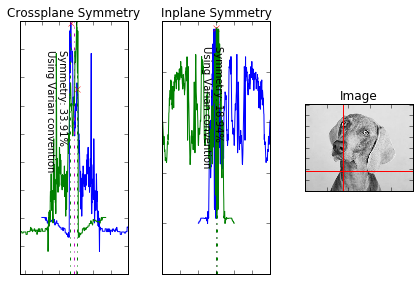

In [80]:
my_img.plot_symmetry()

In [43]:
crossplane_sym = my_img.symmetry()[0]
inplane_sym = my_img.symmetry()[1]
print(crossplane_sym, inplane_sym)

6.66788928939 25.3323955292


In [52]:
def crossplane_sym(img_path):
    my_img = BeamImage(img_path)
    crossplane_sym = my_img.symmetry()[0]
    return crossplane_sym

def inplane_sym(img_path):
    my_img = BeamImage(img_path)
    inplane_sym = my_img.symmetry()[1]
    return inplane_sym

In [ ]:
rows = []
#converting url to a saved file
for url in cleaned_df.image:
    print(url)
    filename = url.split('/')[-1]
    urllib.request.urlretrieve( url , 'Images/'+filename)
    try:
        cp_sym = crossplane_sym('Images/'+filename)
    except:
        cp_sym = None
    try:
        ip_sym = inplane_sym('Images/'+filename)
    except:
        ip_sym = None
    rows.append([url, cp_sym, ip_sym])
    
symmetry_df = pd.DataFrame(rows, columns = ['url', 'crossplane_sym', 'inplane_sym'])


http://ecx.images-amazon.com/images/I/519lYUvAxDL._QL70_.jpg
http://ecx.images-amazon.com/images/I/51MCovXGdsL._QL70_.jpg
http://ecx.images-amazon.com/images/I/51hNjtVjR3L._QL70_.jpg
http://ecx.images-amazon.com/images/I/51SKAEkpPpL._QL70_.jpg
http://ecx.images-amazon.com/images/I/41q3a2kGY0L._QL70_.jpg
http://ecx.images-amazon.com/images/I/51XnRDdslxL._QL70_.jpg
http://ecx.images-amazon.com/images/I/51v1lna5boL._QL70_.jpg
http://ecx.images-amazon.com/images/I/513kXaEZ9yL._QL70_.jpg
http://ecx.images-amazon.com/images/I/51UzUtS5U8L._QL70_.jpg
http://ecx.images-amazon.com/images/I/51RR92eUvBL._QL70_.jpg
http://ecx.images-amazon.com/images/I/61CCY23qgLL._QL70_.jpg
http://ecx.images-amazon.com/images/I/51zMxr5Al8L._QL70_.jpg
http://ecx.images-amazon.com/images/I/51GVqbGMe7L._QL70_.jpg
http://ecx.images-amazon.com/images/I/51%2B3CDCMvwL._QL70_.jpg
http://ecx.images-amazon.com/images/I/51NruPx-1IL._QL70_.jpg
http://ecx.images-amazon.com/images/I/51mUS80BRNL._QL70_.jpg
http://ecx.images-amaz

In [70]:
symmetry_df.to_csv('data/symmetry_df.csv')
# merge this dataframe with overall dataframe, based on urlfor url in cleaned_df.image:

In [65]:
rows = []

url = 'http://ecx.images-amazon.com/images/I/41q3a2kGY0L._QL70_.jpg'
    
filename = url.split('/')[-1]
urllib.request.urlretrieve( url , 'Images/'+filename)
cp_sym = crossplane_sym('Images/'+filename)
ip_sym = inplane_sym('Images/'+filename)
rows.append([url, cp_sym, ip_sym])
    
symmetry_df = pd.DataFrame(rows, columns = ['image', 'crossplane_sym', 'inplane_sym'])

UnboundLocalError: local variable 'max_idx' referenced before assignment